In [338]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [339]:
os.chdir('/Users/srivantv/Desktop')
data = pd.read_csv('Fuel.csv')

In [340]:
X = data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
y = data['CO2EMISSIONS'].values

In [341]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

In [342]:
learning_rate = 0.01
num_epochs = 10000

In [343]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

In [344]:
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


In [345]:
num_samples, num_features = X_train.shape
weights = np.zeros(num_features)
bias = 0

In [346]:
for epoch in range(num_epochs):
    dw_dj=np.zeros(num_features)
    y_predicted = np.dot(X_train, weights) + bias
    
    for j in range(num_features):
        dw_dj[j] += (1/num_samples) * np.sum(np.dot(X_train[:, j], (y_predicted - y_train)))
    dw_db=0
    dw_db+=np.sum(y_predicted-y_train)/num_samples
    weights-=learning_rate*dw_dj
    bias-=learning_rate*dw_db

In [347]:
y_pred = np.dot(X_test, weights) + bias

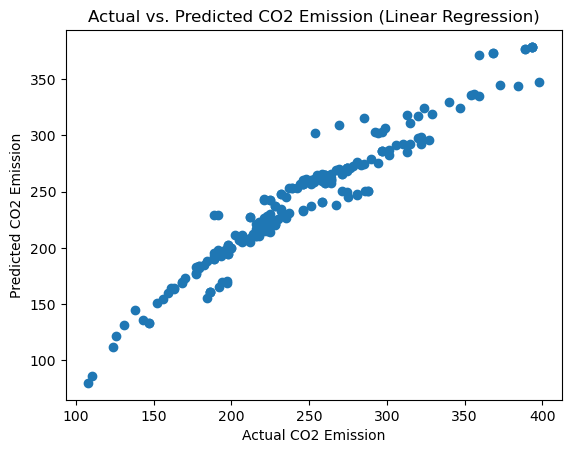

In [348]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission (Linear Regression)")
plt.show()

In [349]:
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [350]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f'RMSE: {rmse:.2f}')

R-squared: 0.94
RMSE: 14.91


In [351]:
#Comparing my result with scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [352]:
model = LinearRegression()


In [353]:
model.fit(X_train,y_train)

LinearRegression()

In [354]:
y_pred=model.predict(X_test)

In [355]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [356]:
print(f'R-squared: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.94
RMSE: 14.91


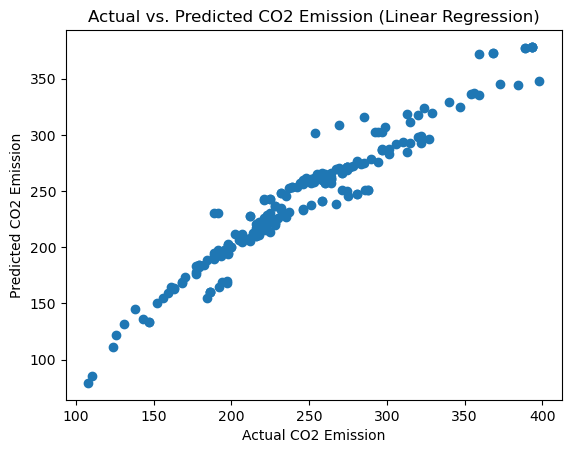

In [357]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emission")
plt.ylabel("Predicted CO2 Emission")
plt.title("Actual vs. Predicted CO2 Emission (Linear Regression)")
plt.show()